# 1.Import Data

In [1]:
import numpy as np
import pickle
import sklearn
from tqdm import tqdm

In [2]:
y_name={
    "y_train":"train_y",
    "y_test":"test_y"
}

In [3]:
def open_pkl(file_name):
    all_data=dict()
    for each_key in file_name.keys():
        name = file_name[each_key]
        pickle_file = open('DataSet\\'+name+".pkl",mode="rb")
        data = pickle.load(pickle_file)
        pickle_file.close()
        all_data[each_key]=data
    return all_data

In [4]:
y_data = open_pkl(y_name)
y_train = y_data["y_train"]
y_test = y_data["y_test"]

In [5]:
y_train

array([0, 3, 0, ..., 0, 0, 0])

In [6]:
file_name0={
    "train0":"vec_train_a_no_cor_word2vec",
    "train1":"vec_train_a_no_emo_word2vec",
    "train2":"vec_train_a_emo_word2vec",
    "train3":"vec_train_a_no_cor_glove",
    "train4":"vec_train_a_no_emo_glove",
    "train5":"vec_train_a_emo_glove"
    }
file_name1={
    "test0":"vec_test_a_no_cor_word2vec",
    "test1":"vec_test_a_no_emo_word2vec",
    "test2":"vec_test_a_emo_word2vec",
    "test3":"vec_test_a_no_cor_glove",
    "test4":"vec_test_a_no_emo_glove",
    "test5":"vec_test_a_emo_glove"
}

In [7]:
#import data
def open_pkl_data(file_name):
    all_data=dict()
    for each_key in file_name.keys():
        name = file_name[each_key]
        pickle_file = open('DataSet\\'+name+".pkl",mode="rb")
        data = pickle.load(pickle_file)
        pickle_file.close()
        all_data[each_key]=np.array(data["all"])
    return all_data

In [8]:
train_data = open_pkl_data(file_name0)
test_data = open_pkl_data(file_name1)

In [9]:
len(test_data["test2"])

5509

# 2. Calculation of the average vectors of each sentence

In [10]:
length = len(train_data["train0"][0][0])
print(length)

300


In [11]:
def cal_average(all_data):
    output_dict=dict()
    for key in all_data.keys():
        sentences = list()
        for sentence in all_data[key]:
            sentence = np.array(sentence)
            length = len(sentence)
            sum_sen = sentence.sum(axis=0)
            aver_sen = sum_sen/length
            sentences.append(aver_sen)
        output_dict[key]=sentences
    
    return output_dict

In [12]:
ave_train = cal_average(train_data)
ave_test = cal_average(test_data)

In [13]:
length = len(ave_train["train0"][0])
print(length)

300


In [14]:
ave_train["train0"][0]

array([ 0.0197347 ,  0.02011532,  0.07057699,  0.140625  , -0.12929896,
        0.0546875 ,  0.04604425, -0.06922404,  0.07905748, -0.00508753,
       -0.04500325, -0.14330885, -0.10303751, -0.03794055, -0.1408861 ,
        0.13747491,  0.02424791,  0.1373024 ,  0.03734334, -0.08083767,
       -0.11258146,  0.03589545,  0.12437841, -0.0068868 ,  0.01917765,
        0.0486145 , -0.0858256 , -0.02836439,  0.04513635, -0.08456082,
       -0.01730516,  0.07633676, -0.07582601, -0.0774943 , -0.03611882,
        0.08161926,  0.03910319,  0.08976746,  0.00787014,  0.08762614,
        0.04364183, -0.04054769,  0.21981472,  0.00363329,  0.03651301,
       -0.00219727,  0.01509264, -0.0408393 , -0.01722548, -0.01006402,
       -0.02544488,  0.11697049,  0.0341212 ,  0.02782864,  0.06617567,
        0.05365668, -0.0629264 , -0.02167426,  0.05803087, -0.03417969,
        0.01642524,  0.08057658, -0.1140408 , -0.0113678 , -0.00294834,
       -0.12387424, -0.05321927,  0.1194085 , -0.06337442,  0.00

# 3.SVM Model
## 3.1. build and fit model

In [15]:
from sklearn.svm import SVC
def svm_model(train_data,y_train):
    classifiers = dict()
    for key in tqdm(train_data.keys()):
        svm_classifier = SVC(kernel = 'rbf', random_state=0)
        svm_classifier.fit(train_data[key],y_train)
        classifiers[key]=svm_classifier
    
    return classifiers

In [16]:
classifiers = svm_model(ave_train,y_train)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [22:44<00:00, 227.34s/it]


In [17]:
# save model
def save_data(name,data):
    pickle_file = open('DataSet\\'+name+".pkl",mode='wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

In [18]:
# save model
save_data("Kernel_SVM_all",classifiers)

## 3.2. prediction

In [19]:
# function for getting prediction
def get_prediction(classifiers, ave_test):
    y_pred_dict= dict()
    list1 = list(classifiers.keys())
    list2 = list(ave_test.keys())
    length = len(list1)
    
    for i in tqdm(range(length)):
        y_pred_dict[list2[i]]=classifiers[list1[i]].predict(ave_test[list2[i]])
        
    return y_pred_dict

In [20]:
y_preds = get_prediction(classifiers,ave_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:09<00:00, 31.63s/it]


In [21]:
# function for getting the score of each prediction
def get_scores(classifiers, ave_test):
    y_score_dict= dict()
    list1 = list(classifiers.keys())
    list2 = list(ave_test.keys())
    length = len(list1)
    
    for i in tqdm(range(length)):
        y_score_dict[list2[i]]=classifiers[list1[i]].decision_function(ave_test[list2[i]])
        
    return y_score_dict

In [22]:
y_scores = get_scores(classifiers, ave_test)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [03:08<00:00, 31.40s/it]


In [23]:
# function for saving the predictions and scores
def save_prediction(name,data):
    pickle_file = open('Prediction\\'+name+".pkl",mode='wb')
    pickle.dump(data,pickle_file)
    pickle_file.close()

In [24]:
save_prediction("Kernel_SVM_preds",y_preds)
save_prediction("Kernel_SVM_scores",y_scores)

## 3.3. Evaluation: confusion matrix, accuracy, precision, recall, F1 measure

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# print evaluation result
def get_evaluation(y_test,y_pred):
    ev = dict()
    ev["confusion_matrix"]=confusion_matrix(y_test,y_pred)
    ev["accuracy"] = accuracy_score(y_test,y_pred)
    ev["precision_macro"]=precision_score(y_test,y_pred,average="macro")
    ev["precision_micro"]=precision_score(y_test,y_pred,average="micro")
    ev["precision_weighted"]=precision_score(y_test,y_pred,average="weighted")
    ev["recall_macro"]=recall_score(y_test,y_pred,average="macro")
    ev["recall_micro"]=recall_score(y_test,y_pred,average="micro")
    ev["recall_weighted"]=recall_score(y_test,y_pred,average="weighted")
    ev["F1_score_macro"]=f1_score(y_test,y_pred,average="macro")
    ev["F1_score_micro"]=f1_score(y_test,y_pred,average="micro")
    ev["F1_score_weighted"]=f1_score(y_test,y_pred,average="weighted")
    
    for key in ev.keys():
        if key !="confusion_matrix":
            print("{a} is: {b}".format(a=key, b=ev[key]))
        else:
            print(ev[key])
    
    return ev

    

In [26]:
#"macro": "Calculate metrics for each label, and find their unweighted mean. ",
#"micro": "Calculate metrics globally by counting the total true positives, false negatives and false positives."
#"weighted":"Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). "

def get_evaluation_all(y_test, y_pred_dict):
    for key in tqdm(y_pred_dict.keys()):
        print("evaluation on data {0}".format(key))
        get_evaluation(y_test, y_pred_dict[key])
        print("***************************************")
    

In [27]:
get_evaluation_all(y_test,y_preds)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.72it/s]

evaluation on data test0
[[4111  164  199  203]
 [ 146  115    8   15]
 [  88    5  142   15]
 [  70   12   11  205]]
accuracy is: 0.8300962062080233
precision_macro is: 0.5455345788744732
precision_micro is: 0.8300962062080233
precision_weighted is: 0.8537635719173906
recall_macro is: 0.6349578235333482
recall_micro is: 0.8300962062080233
recall_weighted is: 0.8300962062080233
F1_score_macro is: 0.580875548660781
F1_score_micro is: 0.8300962062080234
F1_score_weighted is: 0.8394417083471093
***************************************
evaluation on data test1
[[4118  161  192  206]
 [ 145  120    7   12]
 [  92    5  140   13]
 [  73    8   12  205]]
accuracy is: 0.8319114176801597
precision_macro is: 0.5517995292453465
precision_micro is: 0.8319114176801597
precision_weighted is: 0.8541143395604697
recall_macro is: 0.6377334034614952
recall_micro is: 0.8319114176801597
recall_weighted is: 0.8319114176801597
F1_score_macro is: 0.5860640344976413
F1_score_micro is: 0.8319114176801597
F1_sco

## 3.4. Evaluation: ROC curve, AUC

In [28]:
# in order to plot ROC curve and calculate AUC, I need to turn y label into 1 hot representation.
# transfer y label from {class:[0,1,2,3]} into {class: [1,0,0,0], [0,1,0,0],[0,0,1,0],[0,0,0,1]}
import tensorflow as tf
y_test1hot = tf.keras.utils.to_categorical(y_test,num_classes=4)

In [29]:
emotion = {"others":0,"happy":1,"sad":2,"angry":3}
print(y_test1hot[13])#3 - 4th
print(y_test1hot[0])#0 - 1st
print(y_test1hot[6])#1 - 2nd

[0. 0. 0. 1.]
[1. 0. 0. 0.]
[0. 1. 0. 0.]


In [30]:
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import matplotlib.pyplot as plt

In [31]:
def compute_roc_auc(y_test1hot, y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_class = 4
    
    # compute roc curve and auc based on each label
    for i in range(n_class):
        fpr[i],tpr[i],_ = roc_curve(y_test1hot[:,i],y_score[:,i])
        roc_auc[i] = auc(fpr[i],tpr[i])
    
    # compute roc curve and auc based on average type = "micro"
    fpr["micro"],tpr["micro"],_=roc_curve(y_test1hot.ravel(),y_score.ravel())
    roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])
    
    # compute roc curve and auc based on average type = "macro"
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_class)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_class):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        
    # Finally average it and compute AUC
    mean_tpr = mean_tpr/n_class
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"],tpr["macro"])
    
    return fpr, tpr, roc_auc

In [32]:
def compute_roc_auc_all(y_test1hot, y_scores):
    fprs=dict()
    tprs=dict()
    roc_aucs=dict()
    for key in tqdm(y_scores.keys()):
        fprs[key],tprs[key],roc_aucs[key]=compute_roc_auc(y_test1hot,y_scores[key])
    
    return fprs,tprs,roc_aucs

In [33]:
def plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "macro": "only show macro curve",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if (choose !="macro") and (choose !="label"):
        # draw the line of micro-average ROC curve
        plt.plot(fpr["micro"],tpr["micro"],
                 label="micro-average ROC (AUC: {0:0.2f})".format(roc_auc["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
    if (choose !="micro") and (choose !="label"):
        # draw the line of macro-average ROC curve
        plt.plot(fpr["macro"],tpr["macro"],
                 label="macro-average ROC (AUC: {0:0.2f})".format(roc_auc["macro"]),
                 color = 'navy',linestyle=':',lw=4)
        
    if (choose !="macro") and (choose !="micro"):    
        # draw line of each label
        for i in range(n_class):
            plt.plot(fpr[i],tpr[i],color=colors[i],lw=2,
                     label="ROC of class {0} {1} (AUC: {2:0.2f})"
                     "".format(i,label_name[i],roc_auc[i]))
    
    plt.plot([0,1],[0,1],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower right")
    plt.savefig("Pictures\\{a}\\SingleData\\ROC Curve by model {b}_{c} on data {d}.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [34]:
fprs,tprs,roc_aucs=compute_roc_auc_all(y_test1hot, y_scores)

100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 120.24it/s]


In [35]:
modelname="Kernel_SVM"

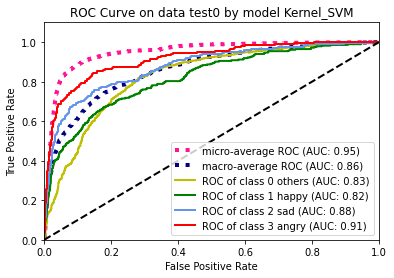

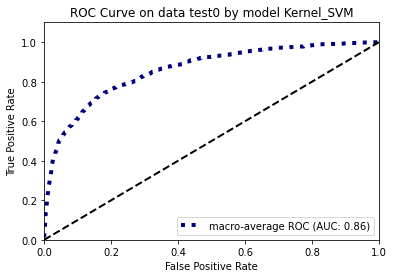

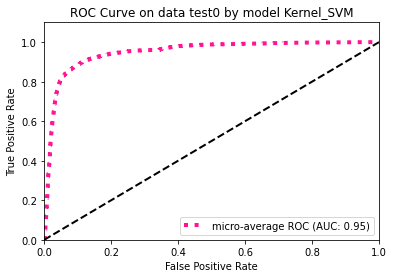

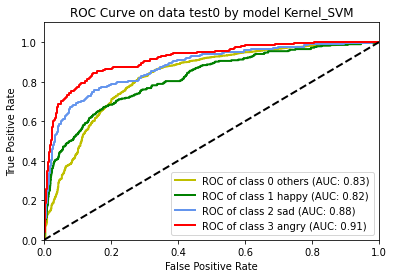

In [36]:
key_name = "test0"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

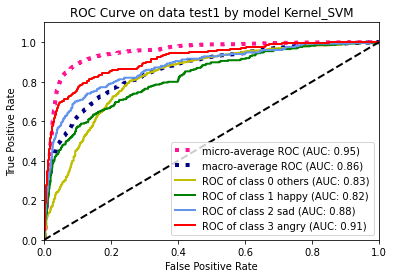

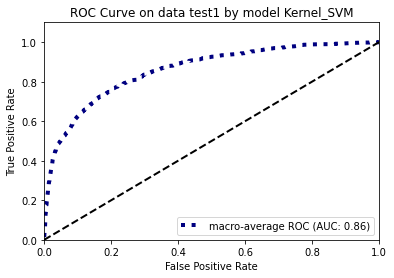

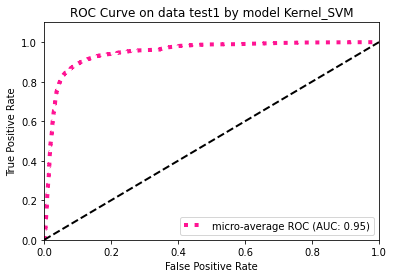

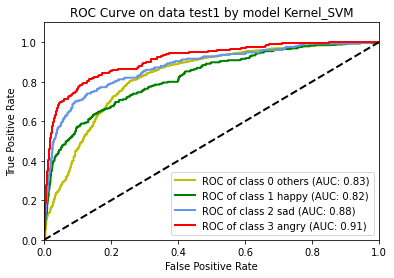

In [37]:
key_name = "test1"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

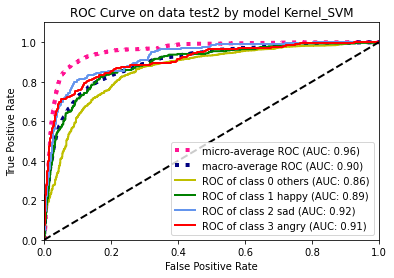

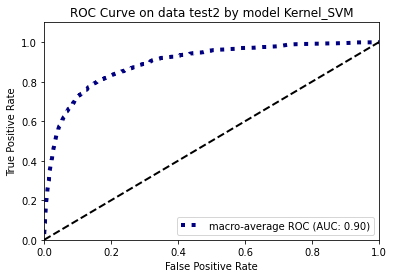

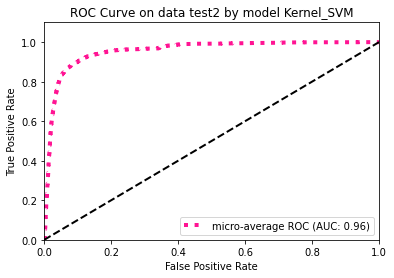

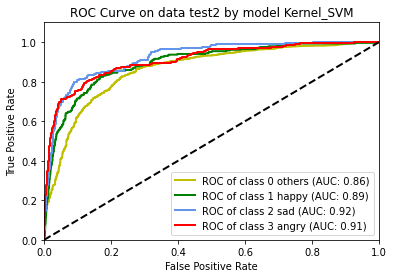

In [38]:
key_name = "test2"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

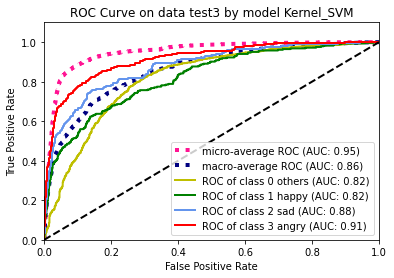

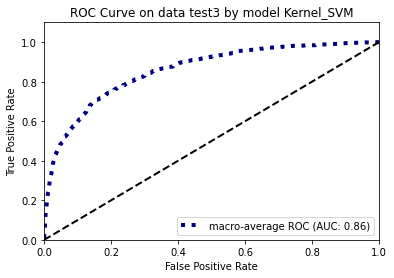

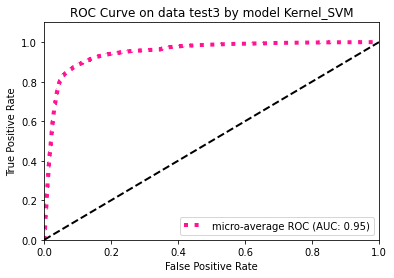

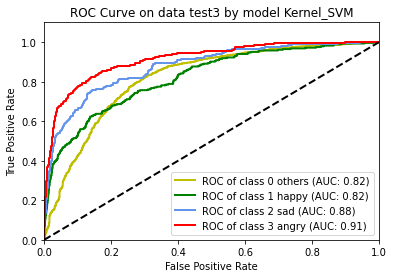

In [39]:
key_name = "test3"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

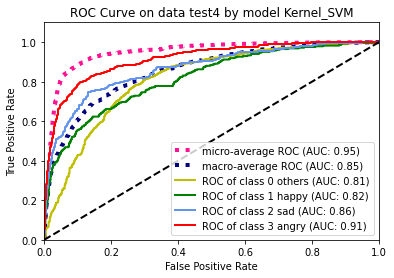

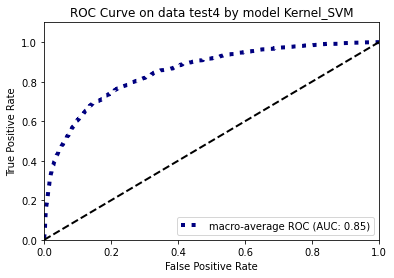

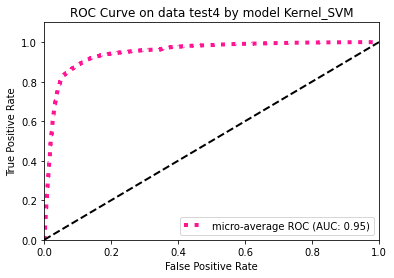

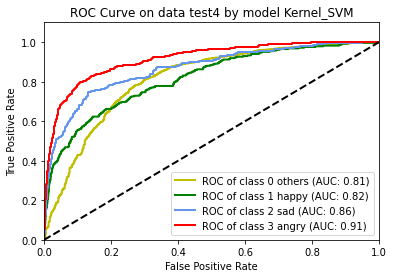

In [40]:
key_name = "test4"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

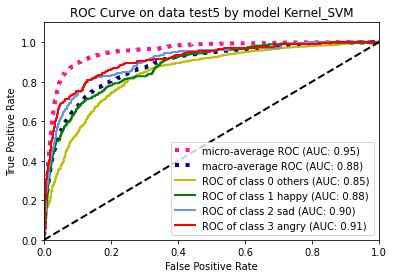

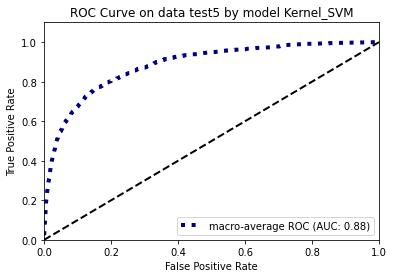

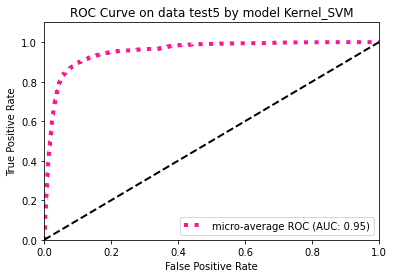

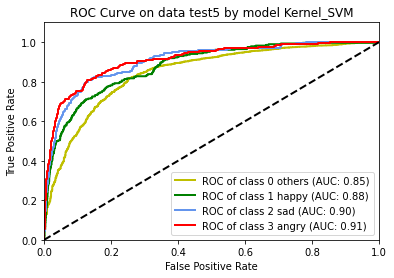

In [41]:
key_name = "test5"
fpr = fprs[key_name]
tpr = tprs[key_name]
roc_auc = roc_aucs[key_name]
dataname=key_name
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "all")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "macro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "micro")
plot_roc(fpr, tpr, roc_auc, dataname,modelname,choose = "label")

## 3.5. Evaluation: P-R curve, average precision

In [42]:
def compute_p_r_curve(y_test1hot, y_score):
    n_class = 4
    precision = dict()
    recall = dict()
    average_precision =dict()
    
    # compute P-R curve on each label
    for i in range(n_class):
        precision[i],recall[i], _ = precision_recall_curve(y_test1hot[:,i],y_score[:,i])
        average_precision[i] = average_precision_score(y_test1hot[:,i],y_score[:,i])
        
    # compute P-R curve with average = "micro"
    precision["micro"],recall["micro"],_=precision_recall_curve(y_test1hot.ravel(),y_score.ravel())
    average_precision["micro"]=average_precision_score(y_test1hot,y_score,average="micro")
    
    return precision,recall,average_precision

In [43]:
def compute_p_r_curve_all(y_test1hot, y_scores):
    recalls=dict()
    precisions=dict()
    average_precisions=dict()
    for key in y_scores.keys():
        recalls[key],precisions[key],average_precisions[key]=compute_p_r_curve(y_test1hot,y_scores[key])
    
    return recalls,precisions,average_precisions
    

In [44]:
def plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all"):
    n_class=4
    
    # make variable choose as command for choosing which curve to show
    # below it's the explaination of choose
    ex_choose = {
        "all": "show all curves",
        "micro": "only show micro curve",
        "label": "only show curves of labels"
        }
    
    colors = ["y", "g","cornflowerblue","r"]
    label_name = ["others", "happy","sad","angry"]
    plt.figure()
    
    if choose !="label":
        # draw the line of micro-average ROC curve
        plt.plot(recall["micro"],precision["micro"],
                 label="micro-average P-R curve (average precision: {0:0.2f})".format(average_precision["micro"]),
                 color = 'deeppink',linestyle=':',lw=4)
    
        
    if choose !="micro":    
        # draw line of each label
        for i in range(n_class):
            plt.plot(recall[i],precision[i],color=colors[i],lw=2,
                     label="P-R curve of class {0} {1} (average precision: {2:0.2f})"
                     "".format(i,label_name[i],average_precision[i]))
    
    plt.plot([0,1],[1,0],linestyle="--",color='k',lw=2)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.1])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('P-R Curve on data {0} by model {1}'.format(dataname,modelname))
    
    plt.legend(loc="lower left")
    plt.savefig("Pictures\\{a}\\SingleData\\P-R Curve by model {b}_{c} on data {d}.png".format(a=modelname,d=dataname,b=modelname,c=choose))
    plt.show()
    

In [45]:
recalls,precisions,average_precisions = compute_p_r_curve_all(y_test1hot, y_scores)

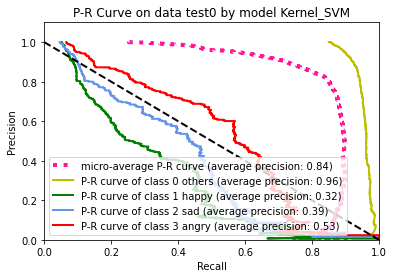

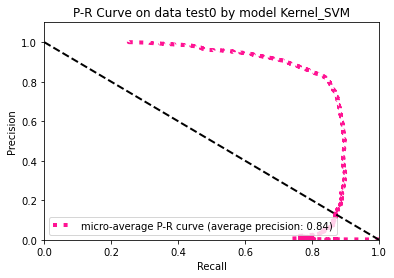

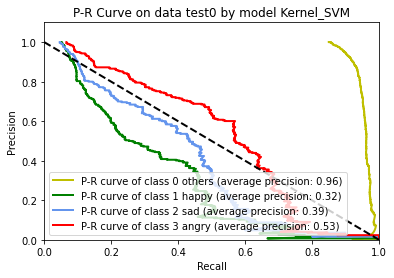

In [46]:
key_name="test0"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

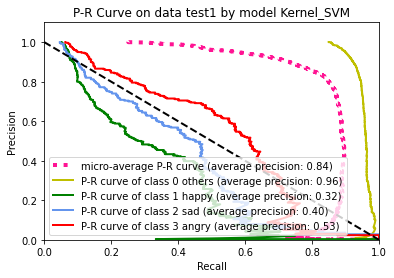

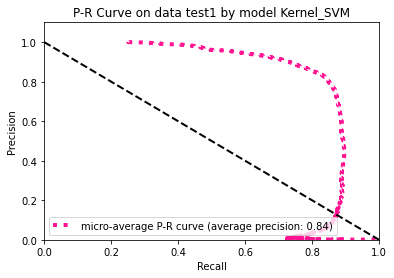

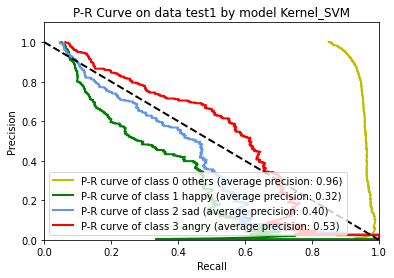

In [47]:
key_name="test1"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

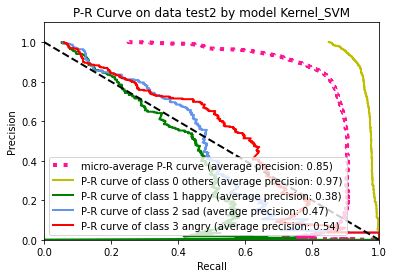

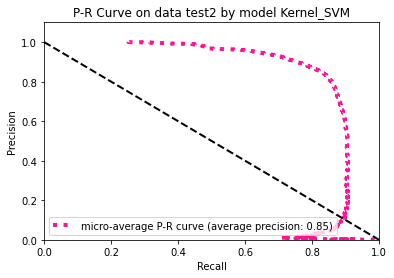

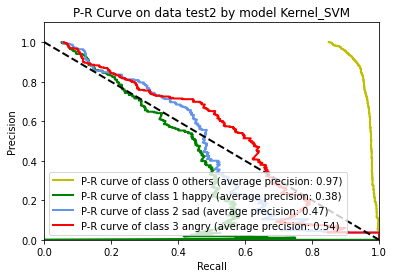

In [48]:
key_name="test2"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

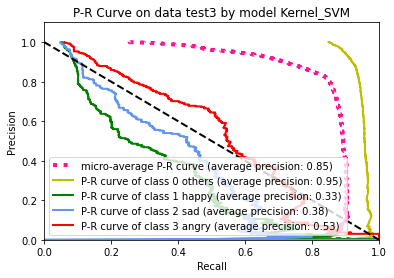

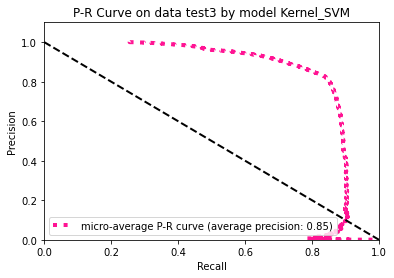

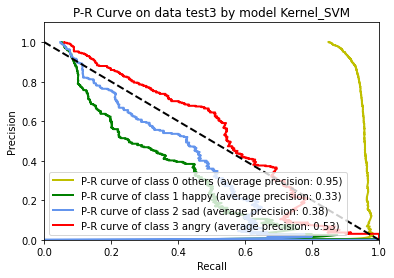

In [49]:
key_name="test3"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

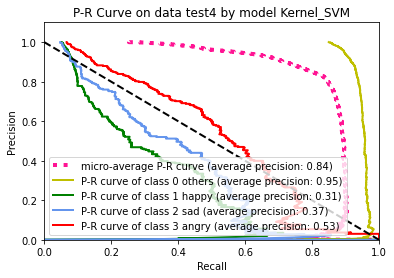

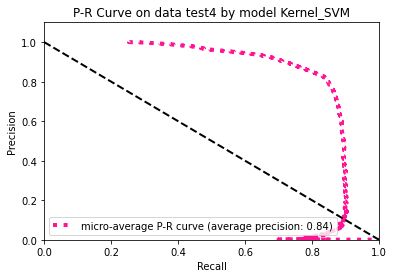

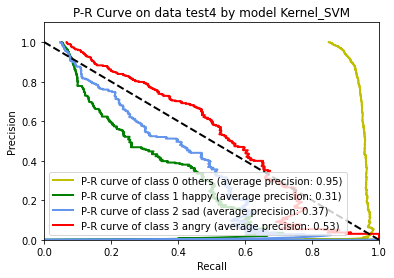

In [50]:
key_name="test4"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

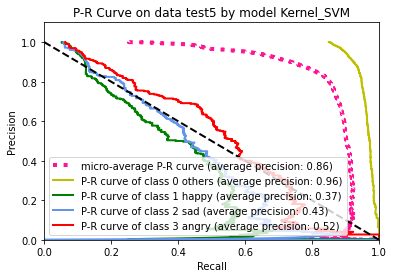

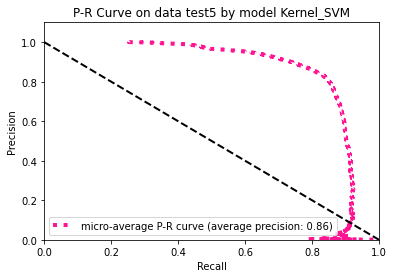

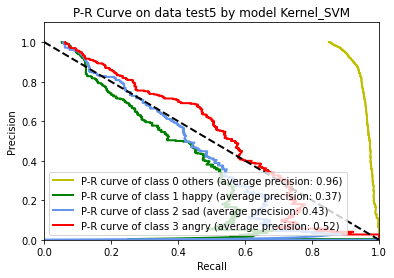

In [51]:
key_name="test5"
recall=recalls[key_name]
precision=precisions[key_name]
average_precision=average_precisions[key_name]
dataname=key_name
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "all")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "micro")
plot_pr(recall, precision, average_precision, dataname,modelname,choose = "label")

# 4. if just want to directly load the model

In [52]:
model_names = {
    "model_all":"Kernel_SVM_all"
}

In [53]:
model_data = open_pkl(model_names)
classifiers = model_data